# Quickstart: Target x Survey, i.e., a DataSet

learn how to merge target inside a survey and simulate a dataset (observed version of target's data)

In [19]:
from skysurvey import survey, target

Following what we learned in Quickstart: target, let's create a SNeIa dataset of 5 000 targets

### Target | data given by nature

In [29]:
%%time
snia = target.SNeIa.from_draw(500)

CPU times: user 14.9 ms, sys: 5.34 ms, total: 20.2 ms
Wall time: 18.7 ms


let's check when "nature started"

In [21]:
starting_date = snia.data["t0"].min()-50 # 50 days before the first target, no need to simulate a survey before that

### Survey | What has been observed when and how. Here ZTF case

In [22]:
%%time
ztf = survey.ZTF.from_random(size=365*2*100, # number of observation  2 years, 100 per day, small for the doc
                     bands=["ztfg","ztfr","ztfi"], # band to observed
                     mjd_range=[starting_date, starting_date+365*4], # timerange of observation
                     skynoise_range=[10,20], # sky noise
                     )

CPU times: user 115 ms, sys: 13.4 ms, total: 128 ms
Wall time: 126 ms


### Target in Survey | let's check which target belongs to which field.

This is particularly optiomized thanks to a combination of shapely, pandas and geopandas

In [23]:
%%time
fieldid_of_targets = ztf.radec_to_fieldid(*snia.data[["ra","dec"]].values.T)

CPU times: user 109 ms, sys: 6.17 ms, total: 115 ms
Wall time: 112 ms


In [24]:
fieldid_of_targets

index_radec
0      [1331, 339, 340]
1           [1460, 466]
2           [455, 1502]
3           [1679, 681]
4           [1376, 383]
             ...       
495         [296, 1338]
496         [395, 1440]
497         [417, 1410]
498         [1454, 460]
499         [243, 1284]
Name: fieldid, Length: 497, dtype: object

### DataSet | The object that exploite the target x survey combination.

In [25]:
from skysurvey import DataSet

this not only match then SN with the target but already simulate the obseving point. 

In [26]:
%%time
dset = DataSet.from_targets_and_survey(snia, ztf)

CPU times: user 2.27 s, sys: 172 ms, total: 2.44 s
Wall time: 2.44 s


In [27]:
dset.data

fieldid          time  band       flux    fluxerr    zp zpsys
0   0      1331  58955.577405  ztfi   0.330261  15.595913  25.0    ab
    1      1331  59007.399158  ztfg   3.541907  11.156620  25.0    ab
    2      1331  59024.613783  ztfg  30.284005  15.166271  25.0    ab
    3      1331  59071.465371  ztfg -22.329838  16.575487  25.0    ab
    4      1331  59107.332114  ztfi -13.303006  14.979442  25.0    ab
...         ...           ...   ...        ...        ...   ...   ...
499 37     1284  60307.995644  ztfr -16.116259  12.481470  25.0    ab
    38     1284  60314.508031  ztfg  17.003926  12.686279  25.0    ab
    39     1284  60358.829057  ztfr   0.269514  16.939305  25.0    ab
    40     1284  60385.702103  ztfr  -9.515290  10.385821  25.0    ab
    41     1284  60402.663701  ztfr -14.154017  10.289330  25.0    ab

[46844 rows x 7 columns]

z         0.187500
x1       -1.059000
c         0.158000
t0    59716.459731
x0        0.000046
Name: 80, dtype: float64

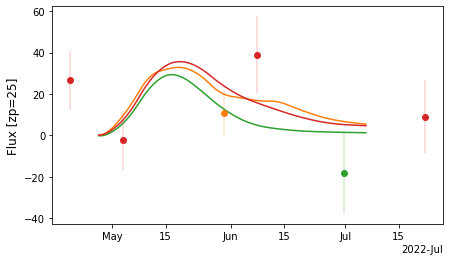

In [28]:
_ = dset.show_target_lightcurve(index=80, phase_window=[-30, 70])
dset.targets.get_template_parameters(index=80)

In [18]:
%%time
dset.get_ndetection(per_band=True)

CPU times: user 1.03 s, sys: 369 ms, total: 1.4 s
Wall time: 1.37 s


level_0  band
0        ztfg     9
         ztfi     5
         ztfr    19
1        ztfg     0
         ztfi     1
                 ..
4998     ztfi     6
         ztfr    11
4999     ztfg     0
         ztfi     0
         ztfr     0
Name: detected, Length: 14967, dtype: int64